# Evaluating Regression Model Exercises


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
from pydataset import data
tips = data("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
# Before I create the model I want to make my baseline
baseline = tips.tip.mean()
tips['baseline']= baseline
baseline

2.9982786885245902

Takeaway: Looks like the average tip is about $3

In [4]:
# Y is defined as what I want to predict
# X is define as the data I want to use to help predict Y

y = tips[['tip']]
X = tips[['total_bill']]


In [5]:
# This is code from the lesson:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# Create the model object
lm = LinearRegression()

# Fit the model to trainig data
lm.fit(tips[['total_bill']] , tips[['tip']])

# Make Prediction
tips['yhat'] = lm.predict(tips[['total_bill']])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


<AxesSubplot:xlabel='total_bill', ylabel='baseline'>

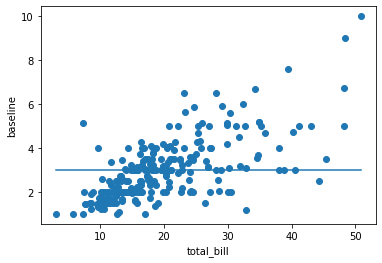

In [20]:
# Taking a look at total_bill and tip
plt.scatter(tips.total_bill, tips.tip);
sns.lineplot(x= 'total_bill', y= 'baseline', data= tips)

### 3. Plot the residuals for the linear regression model that you made.

In [7]:
# Residual is how much error is still remaining after the prediction.
# residual = actual - predicted
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

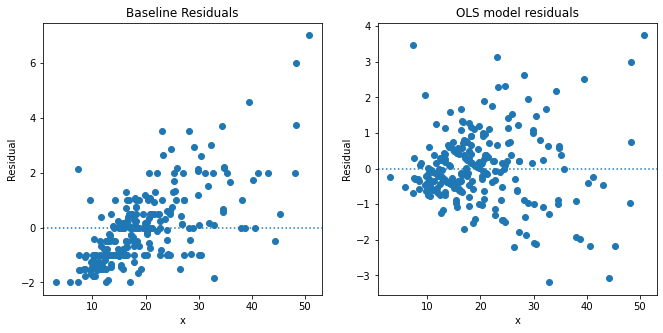

In [8]:
# Using the code from the lesson:
# We want residual plots to have no pattern and look alomot like white noise
# A residual graph with a pattern means your model is missing key variables
# You don't want to see cones, parabolas, sin waves, etc. 
# If you have no idea where to draw a line, then its a good residual chart!

# Residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.total_bill, tips.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.total_bill, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

My OLS residual plot shows a slight cone inclination

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

#### Sum of Squared Errors

In [9]:
# First I have to calculate the square of the residuals
tips['residual^2'] = tips.residual**2
tips['baseline_residual^2'] = tips.baseline_residual**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [10]:
# Now to find my Sum of Squared Errors
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


#### Explained Sum of Squared Errors

In [11]:
ESS = sum((tips.yhat - tips.tip.mean())**2)
ESS

212.4237331984042

#### Total Sum of Squared Errors


In [12]:
TSS = ESS + SSE
print("ESS = ", round(ESS, 2)) # Explained Sum of Squared Errors 
print("SSE = ", round(SSE, 2)) # Sum of Squared Errors 
print("TSS = ", round(TSS, 2)) # Total Sum of Squared Errors

ESS =  212.42
SSE =  252.79
TSS =  465.21


#### Mean Squared Error

In [21]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", "{:.3f}".format(MSE))
print("MSE baseline = ", "{:.3f}".format(MSE_baseline))

MSE =  1.036
MSE baseline =  1.907


#### Root Mean Squared Error

In [22]:
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.3f}".format(RMSE))
print("RMSE baseline = ", "{:.3f}".format(RMSE_baseline))

RMSE =  1.018
RMSE baseline =  1.381


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [15]:
# See above

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [16]:
def SSE_compare(baseline, yhat, target):
    """
    This Function takes in a baseline model, yhat, and the target variable. It then calculates the Sum of Squared
    Errors and compares it to the Baseline Sum of Squared Errors. It will print whether the model is better 
    or worse than the baseline.
    """
    # Residual is how much error is still remaining after the prediction.
    # residual = actual - predicted
    tips['residual'] = target - yhat
    tips['baseline_residual'] = target - baseline

    SSE = tips['residual^2'].sum()
    SSE_baseline = tips['baseline_residual^2'].sum()

    print('SSE =', "{:.1f}".format(SSE))
    print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
    
    if SSE > SSE_baseline:
        print("\nModel did worse than baseline.")
    else:
        print("\nModel did better than baseline.")

In [17]:
SSE_compare(tips.baseline, tips.yhat, tips.tip)

SSE = 252.8
SSE Baseline = 465.2

Model did better than baseline.


### 7. What is the amount of variance explained in your model?

In [18]:
# Remember, R2 is correlation strength. Not how accurate the model is.
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


In [23]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?

### 9. Create a file named `evaluate.py` that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
def plot_residuals(actual, predicted):
    

In [ ]:
def sse(actual , predicted):
    

In [ ]:
def regression_errors
# summary of all the error nnumbers

### 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.